In [1]:
import numpy as np
import matplotlib.pyplot as plt

### interpolate x+1

In [2]:
def interpolate_xp1(x, d):
    return(x+d)

def interpolate_xm1(x, d):
    return(x-d)

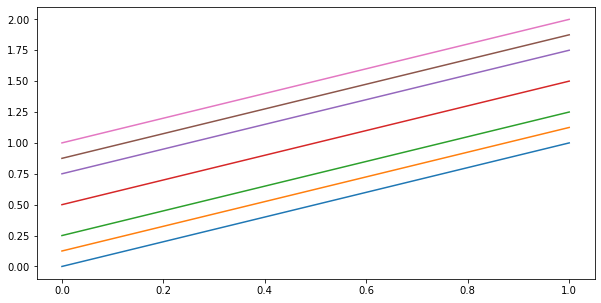

In [3]:
x_ = np.linspace(0, 1, 1000+1)

y0 = interpolate_xp1(x_, d=0)
y18 = interpolate_xp1(x_, d=1/8)
y14 = interpolate_xp1(x_, d=1/4)
y12 = interpolate_xp1(x_, d=1/2)
y34 = interpolate_xp1(x_, d=3/4)
y78 = interpolate_xp1(x_, d=7/8)
y1 = interpolate_xp1(x_, d=1)

plt.figure(figsize=(10, 5))
plt.plot(x_, y0)
plt.plot(x_, y18)
plt.plot(x_, y14)
plt.plot(x_, y12)
plt.plot(x_, y34)
plt.plot(x_, y78)
plt.plot(x_, y1)

plt.show();

### interpolate the Gaussian with x+1

In [4]:
# interpolate a Gaussian

def interpolate_Gaussian(x, mu, sigma, d):
    return(1/(sigma* np.sqrt(2*np.pi)) * np.exp(-0.5 * (interpolate_xm1(x, d)-mu)**2/sigma**2))

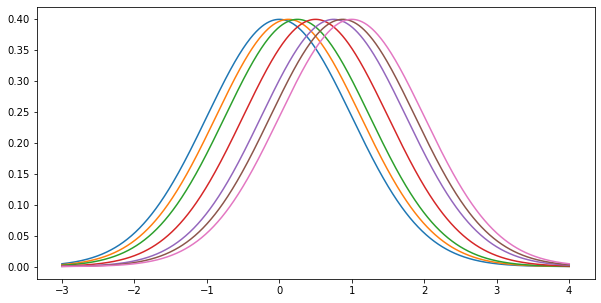

In [5]:
x_G = np.linspace(-3, 4, 1000+1)

y0 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=0)
y18 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=1/8)
y14 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=1/4)
y12 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=1/2)
y34 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=3/4)
y78 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=7/8)
y1 = interpolate_Gaussian(x_G, mu=0, sigma=1, d=1)

plt.figure(figsize=(10, 5))
plt.plot(x_G, y0)
plt.plot(x_G, y18)
plt.plot(x_G, y14)
plt.plot(x_G, y12)
plt.plot(x_G, y34)
plt.plot(x_G, y78)
plt.plot(x_G, y1)

plt.show();

# Interpolate Gaussian and x+1 in same plot

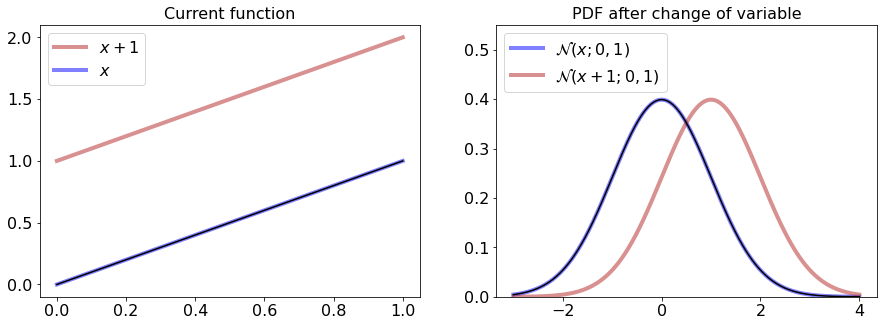

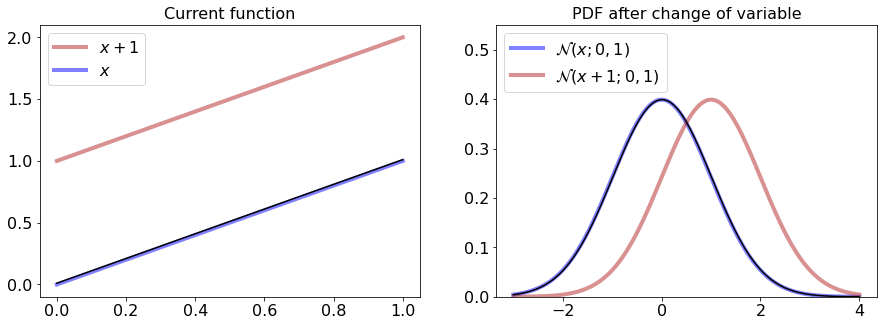

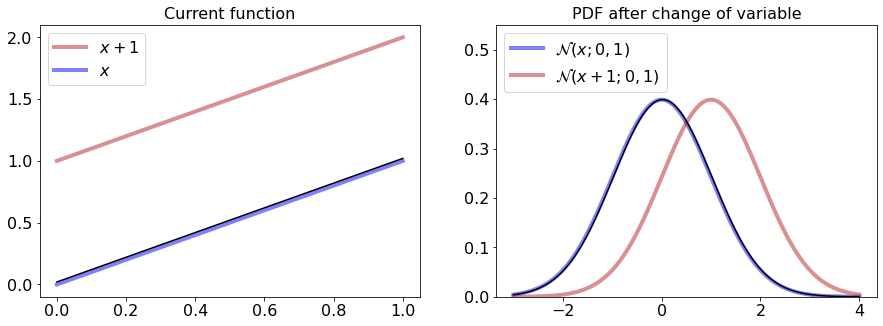

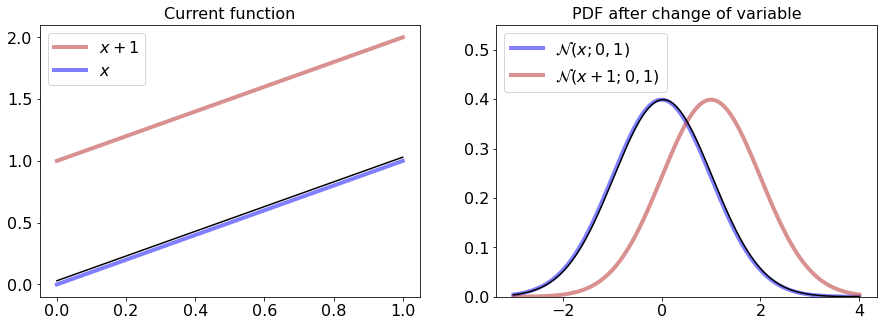

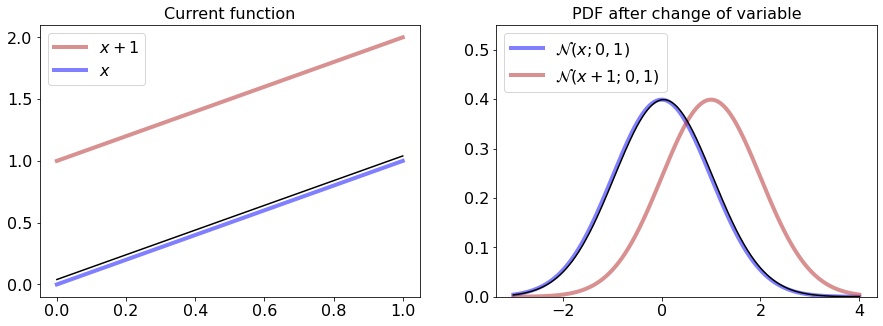

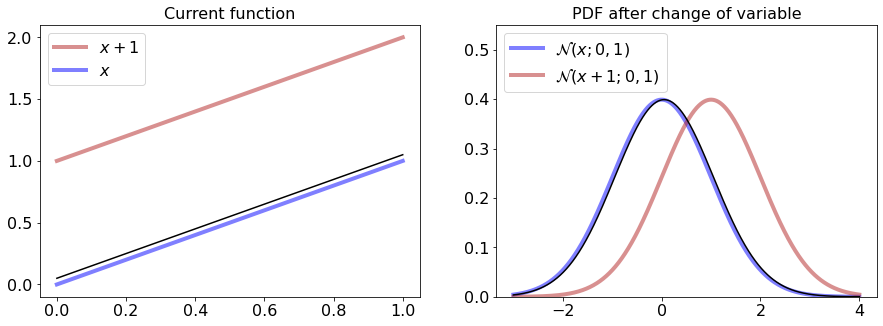

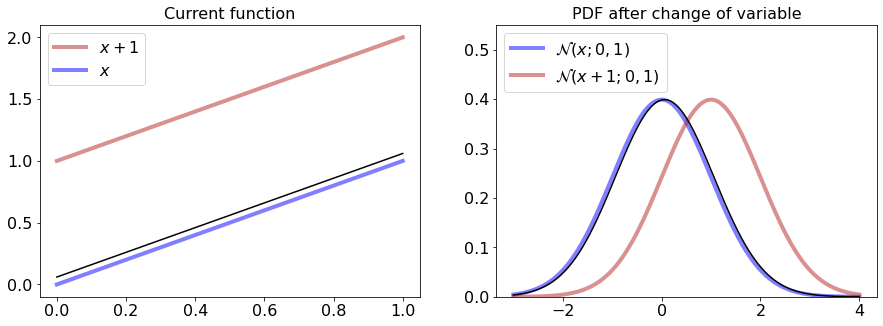

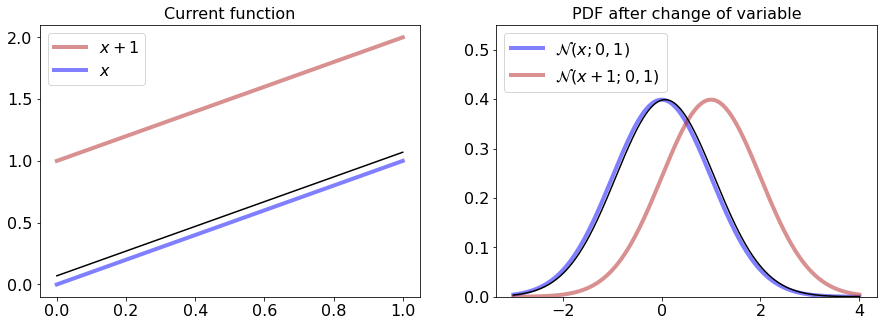

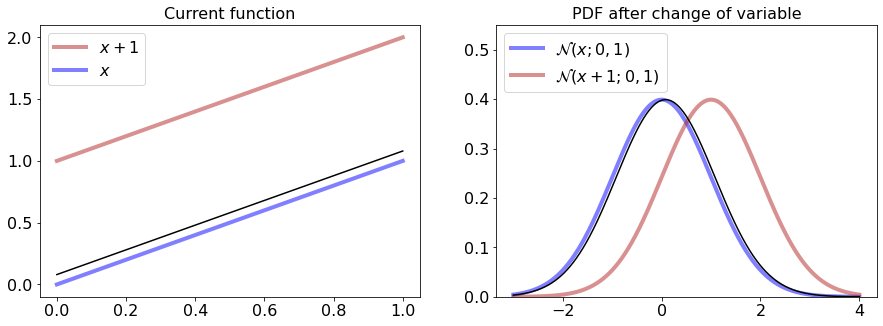

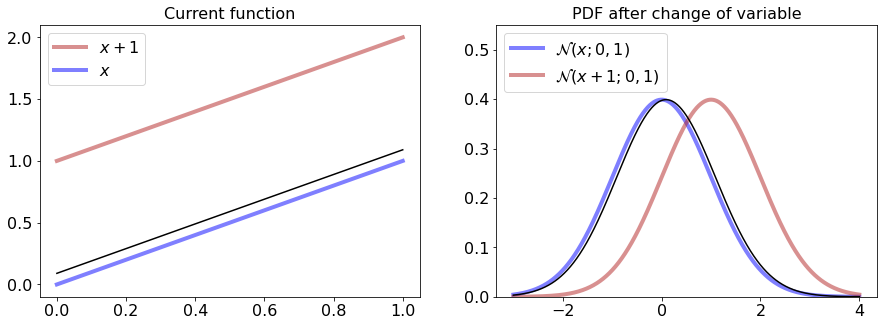

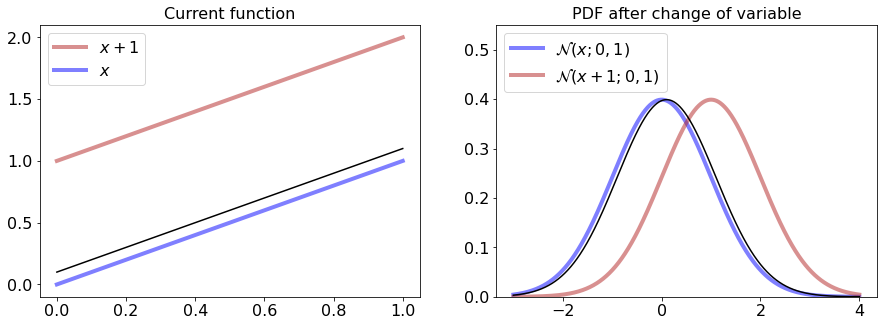

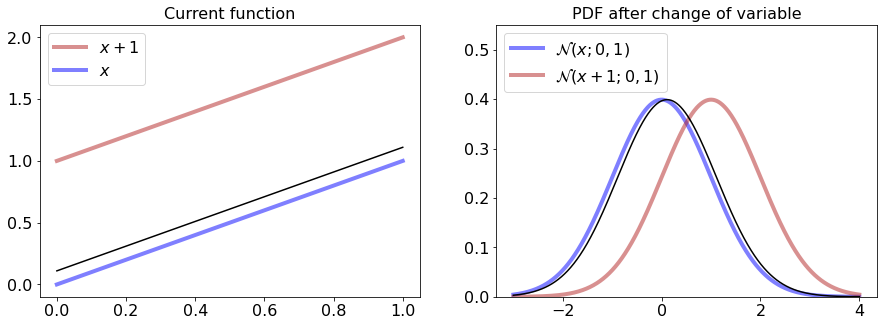

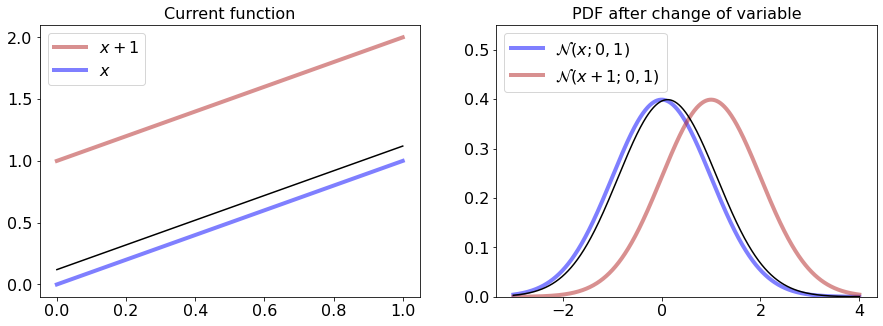

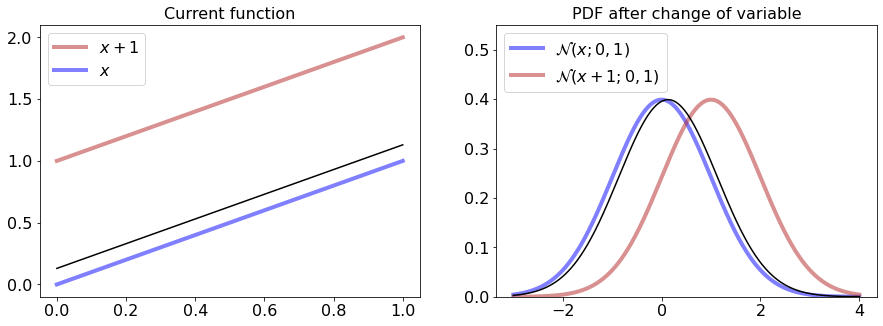

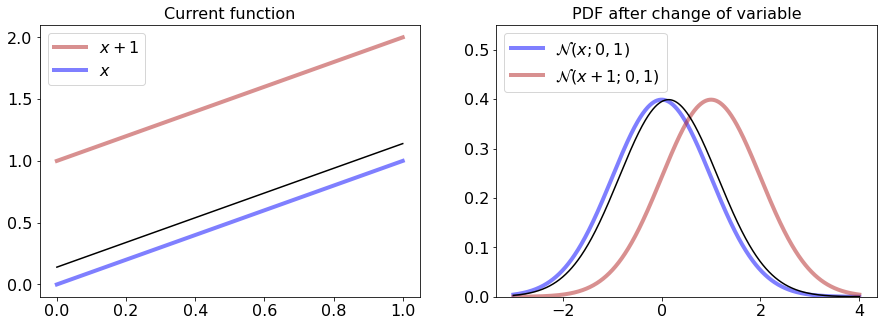

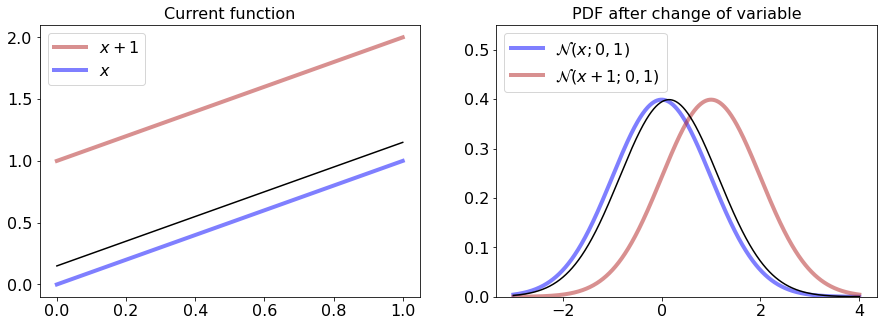

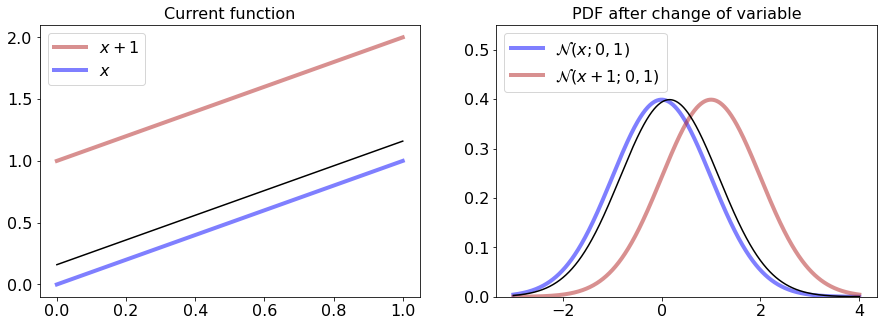

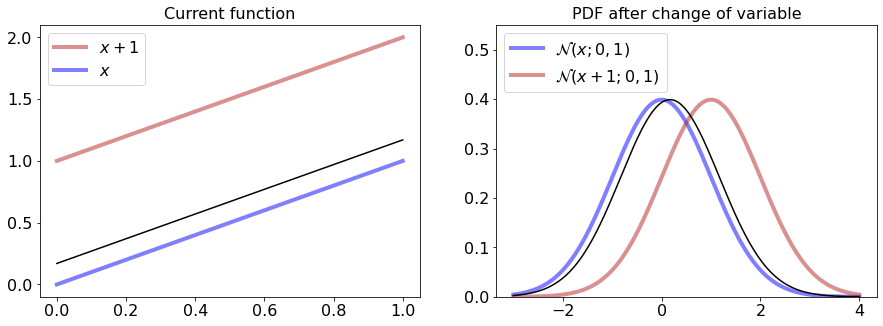

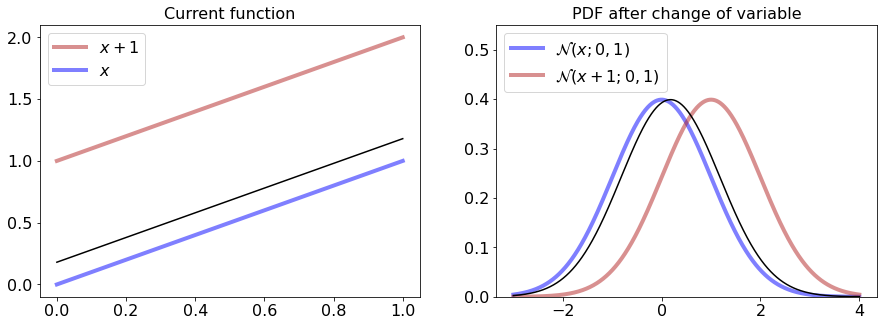

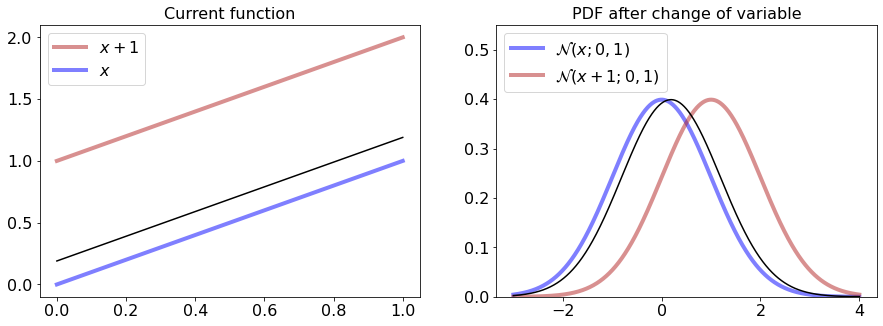

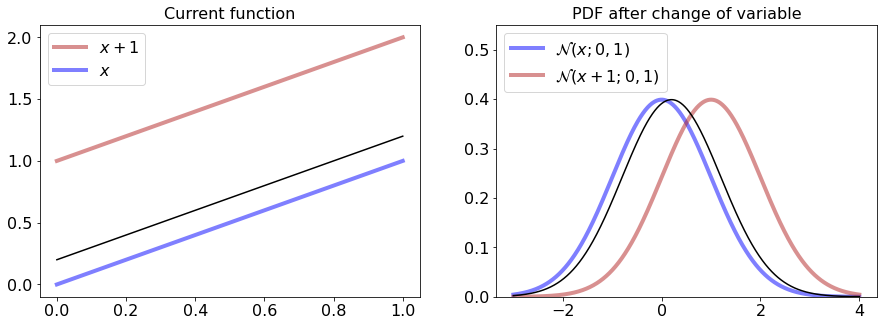

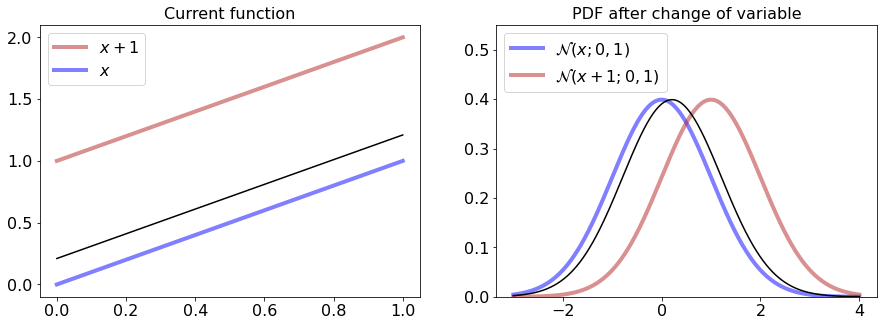

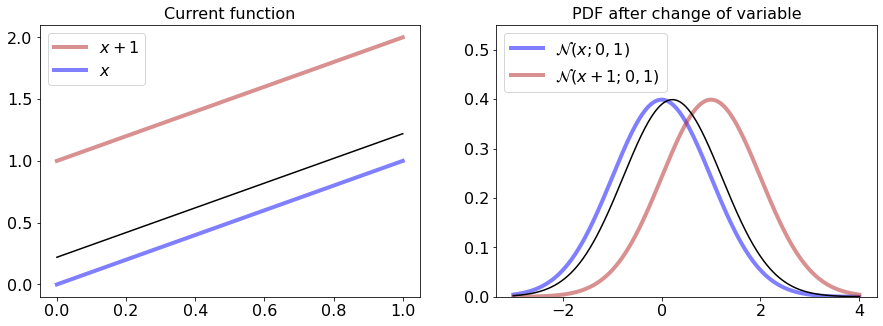

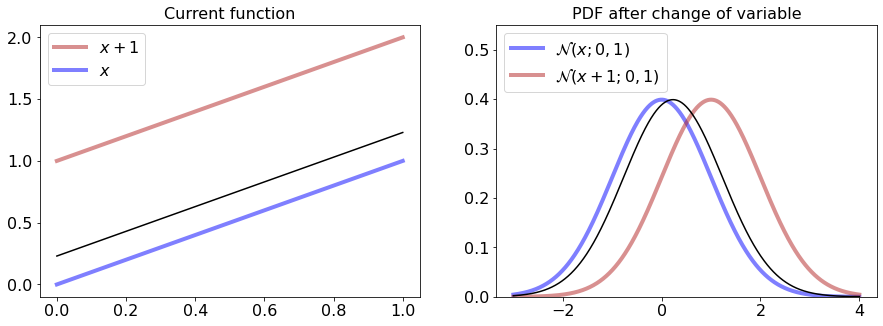

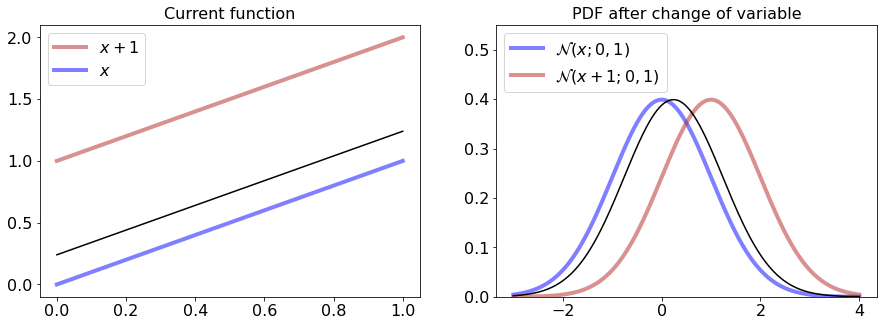

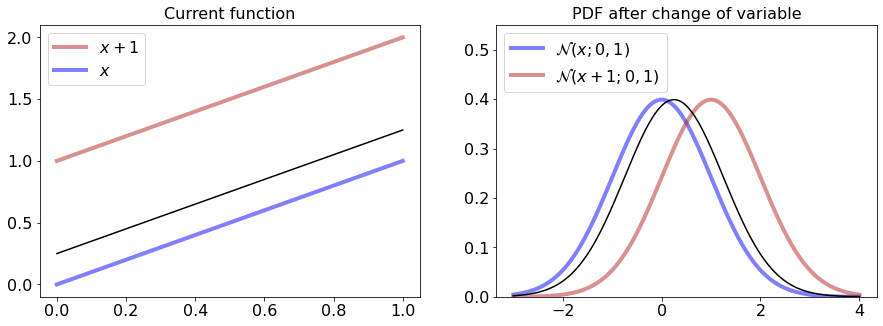

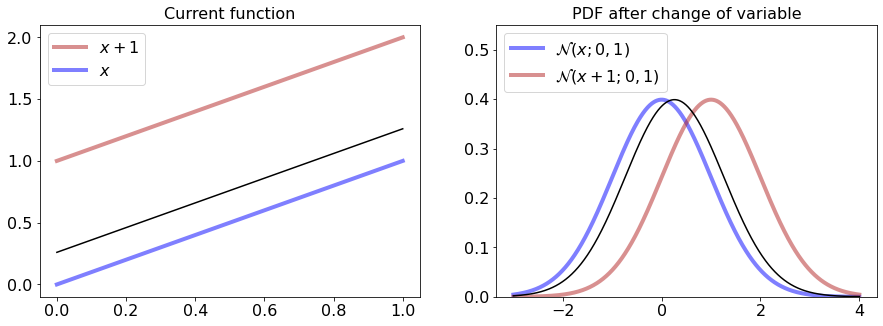

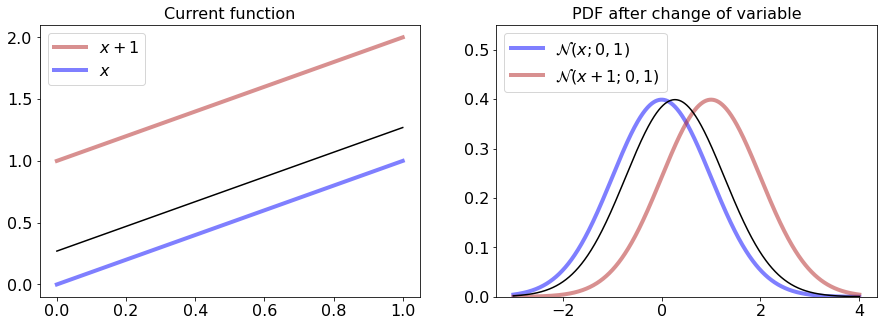

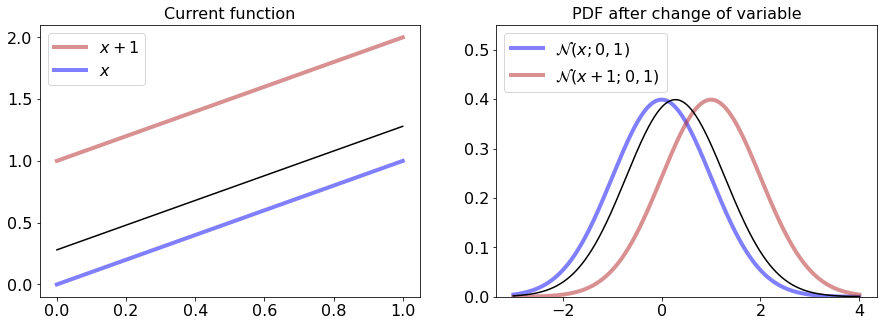

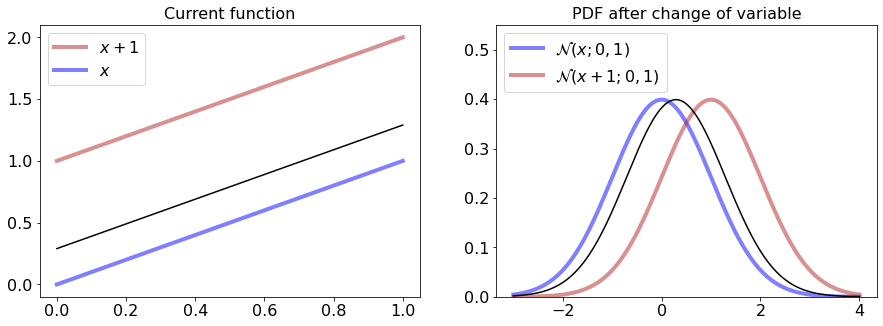

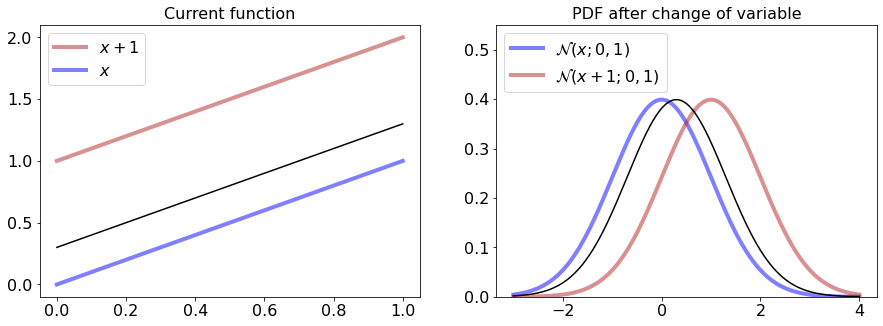

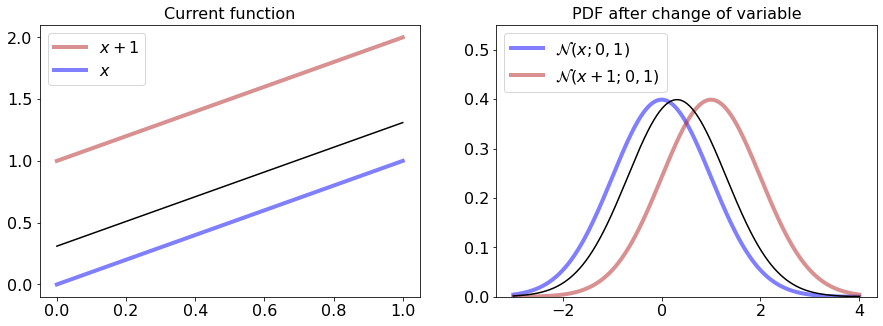

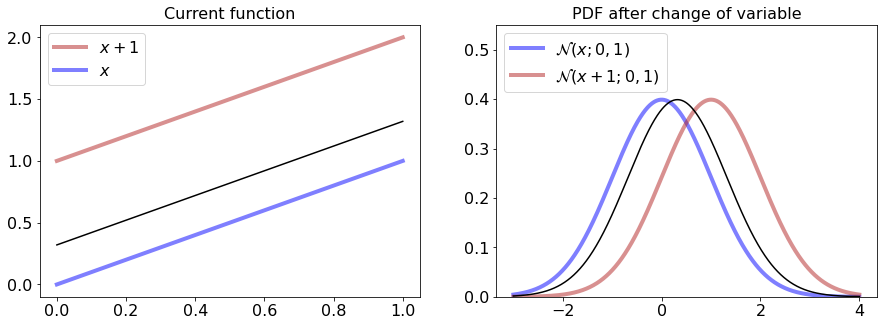

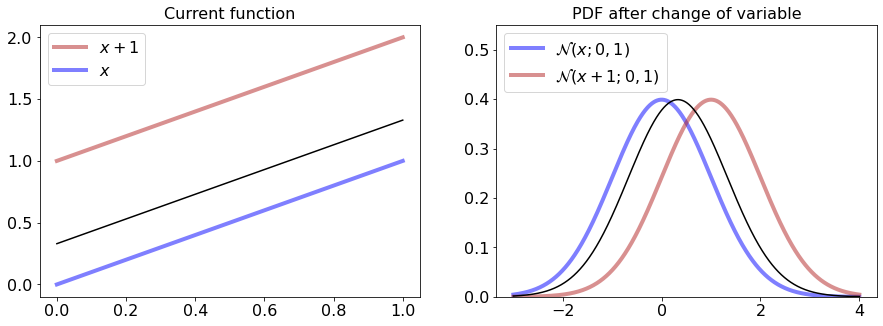

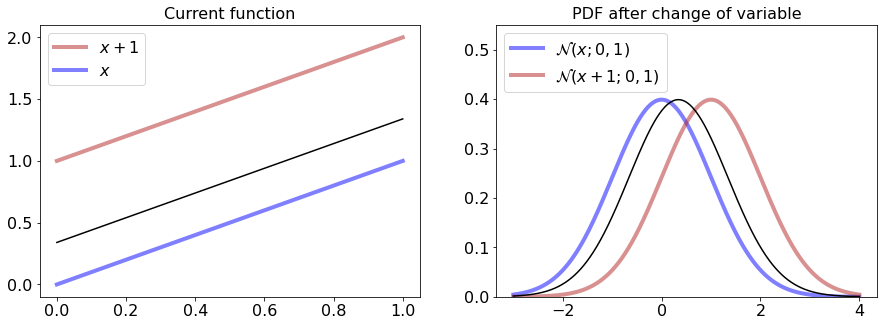

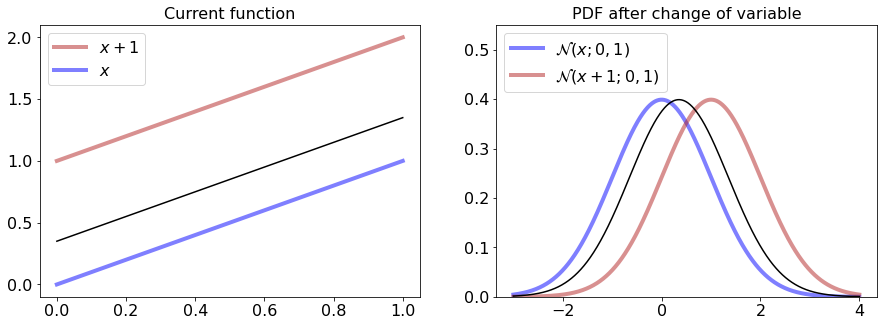

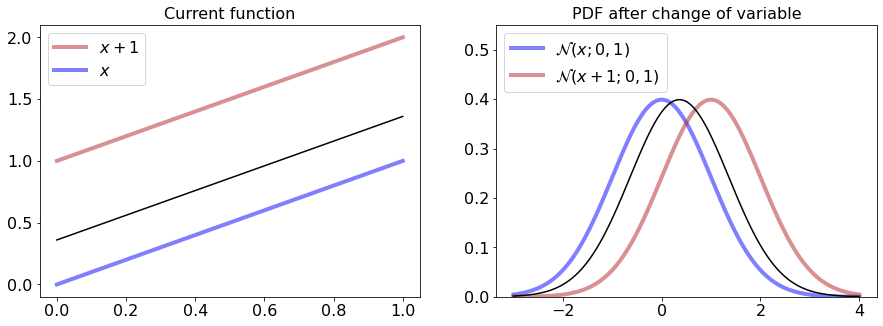

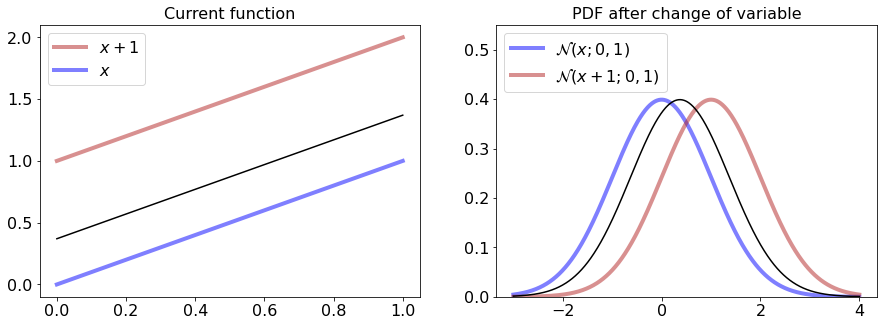

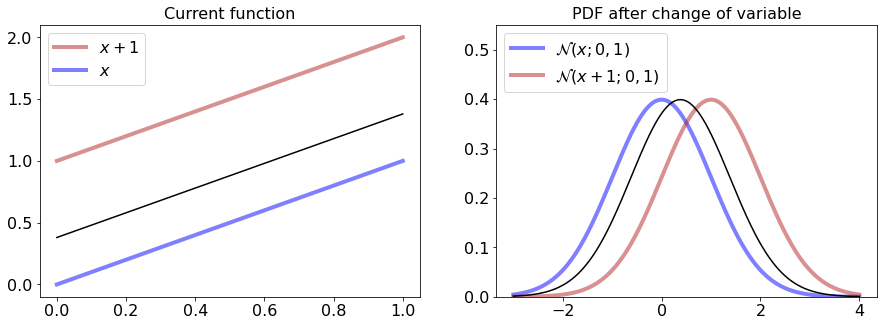

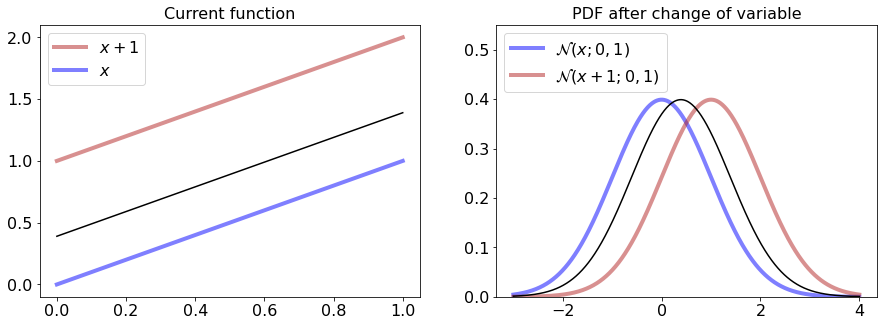

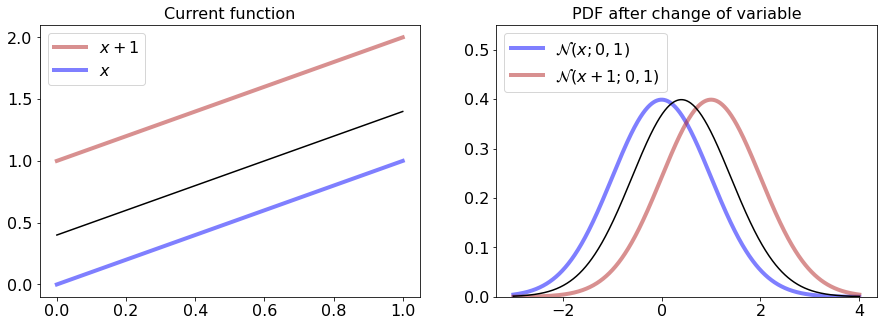

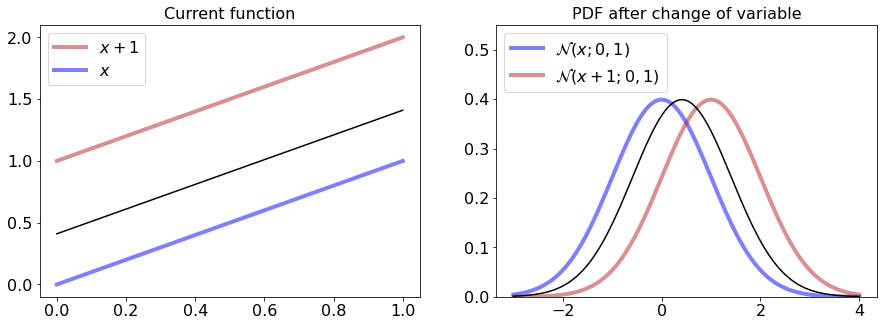

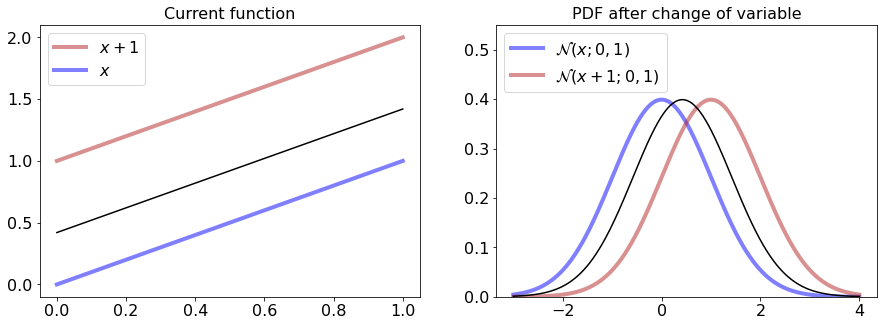

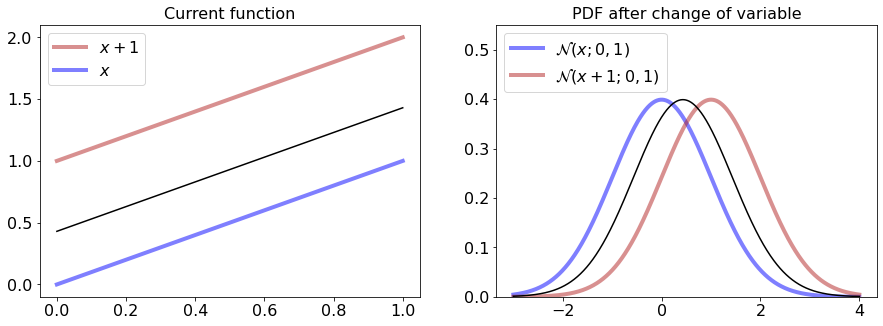

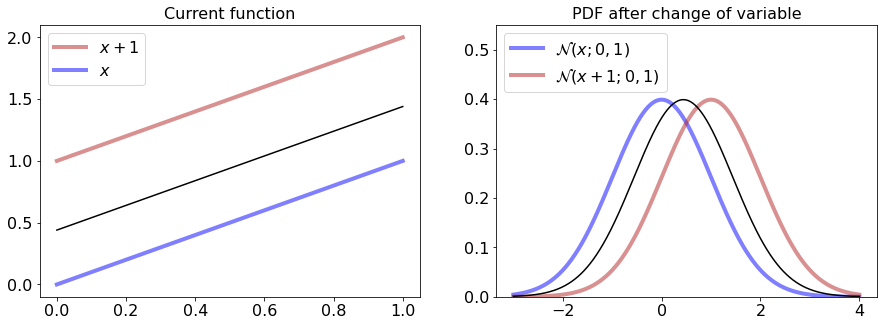

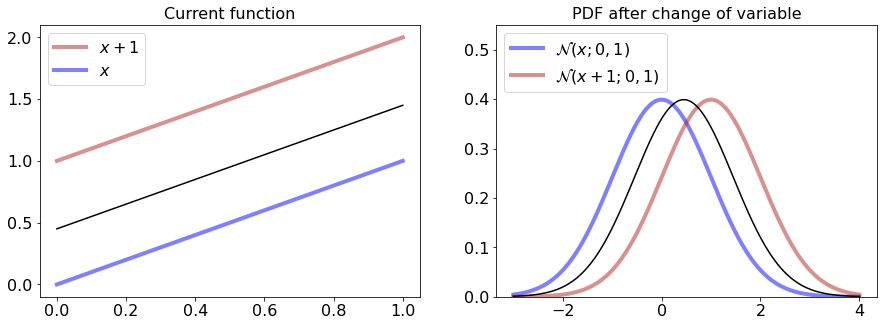

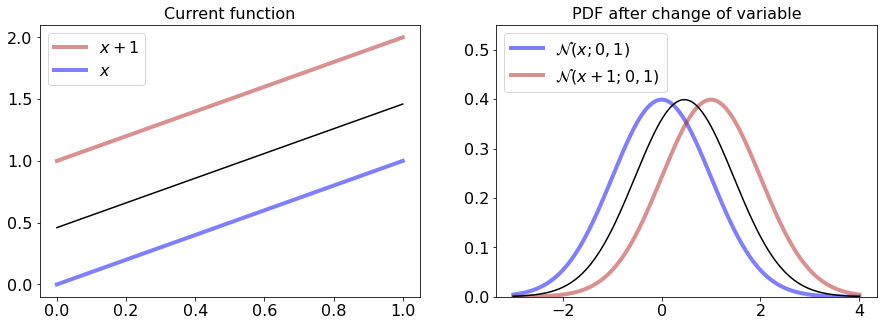

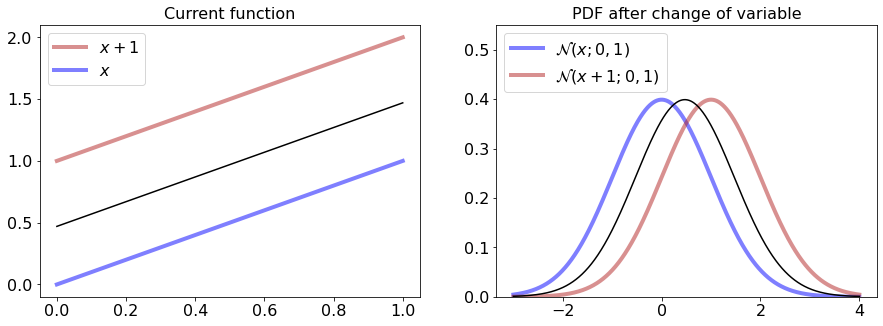

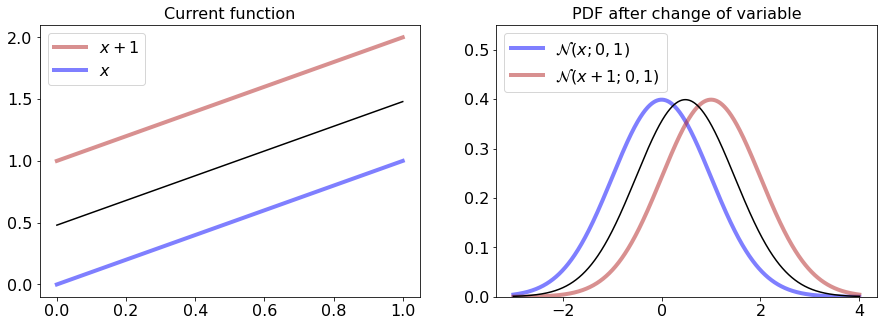

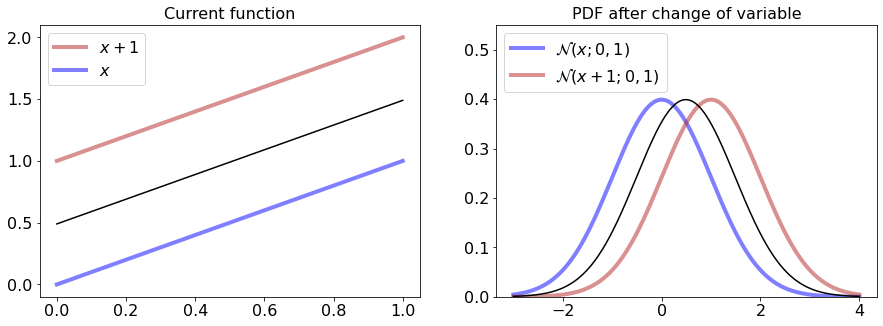

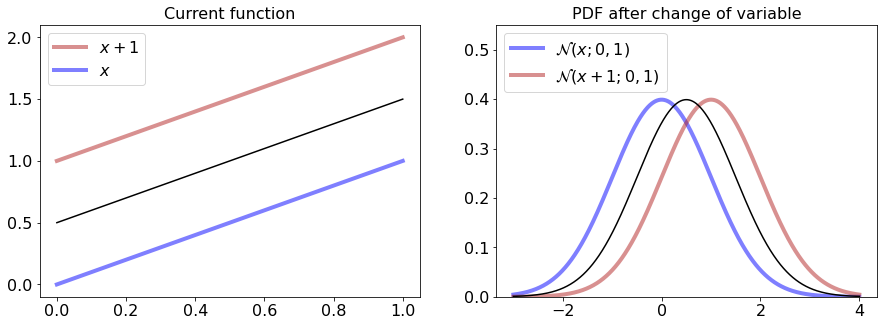

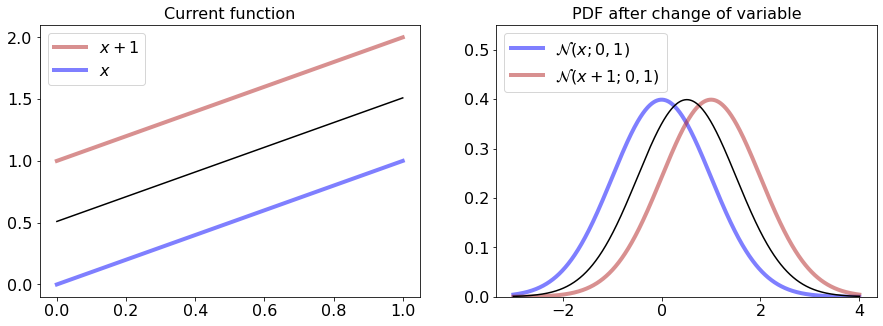

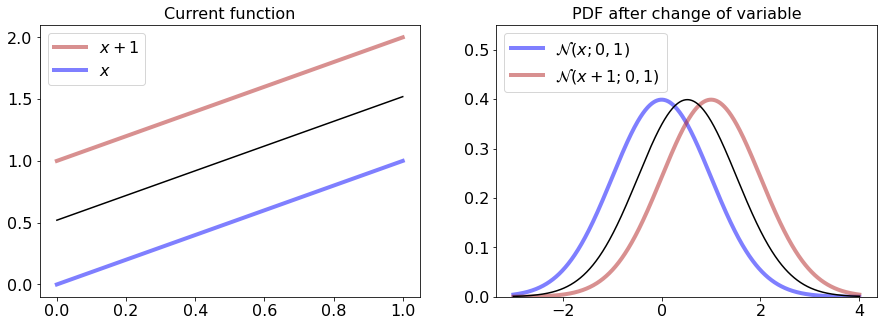

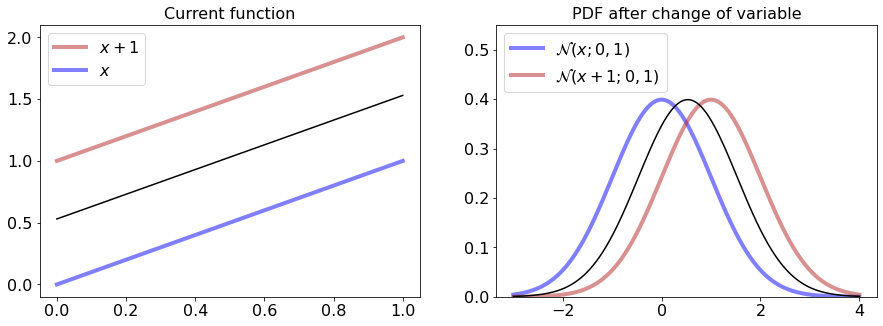

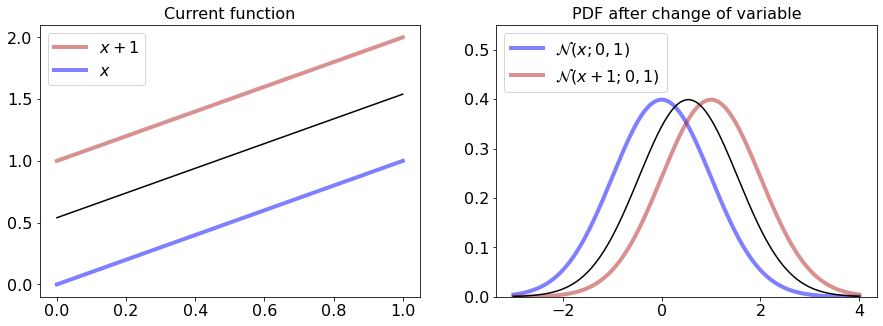

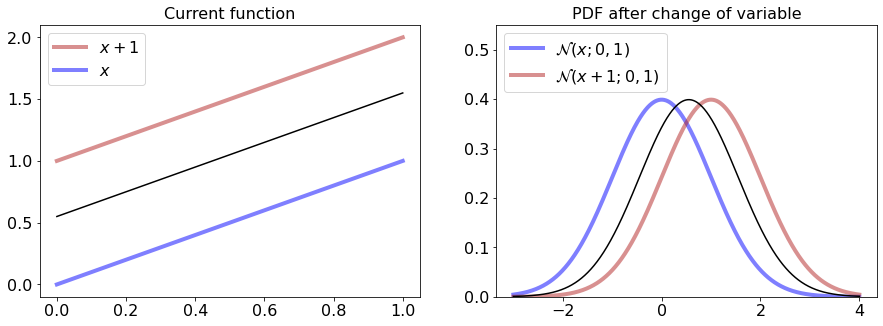

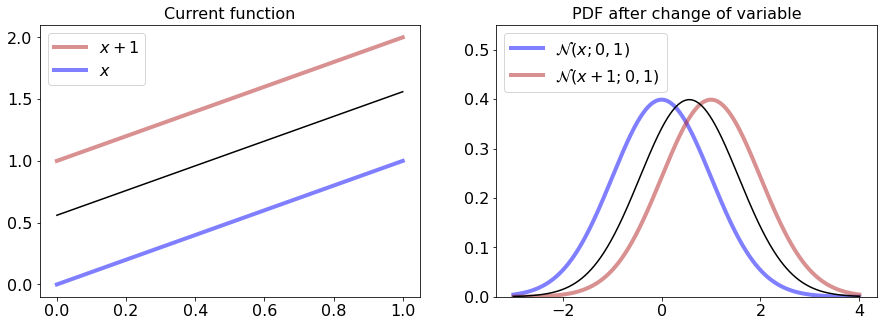

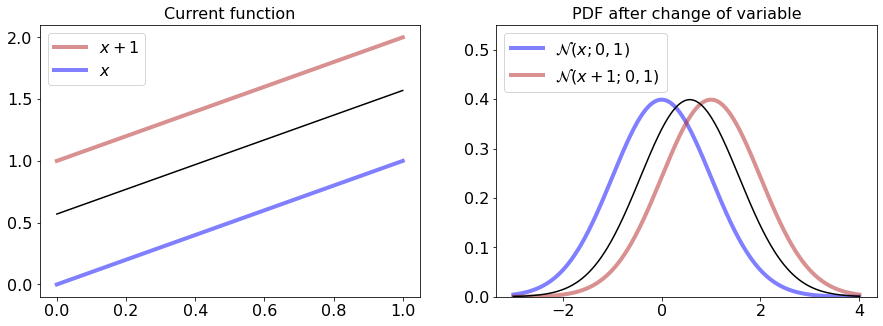

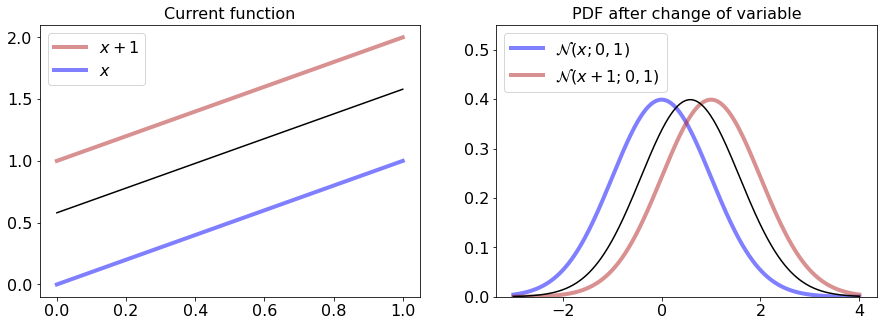

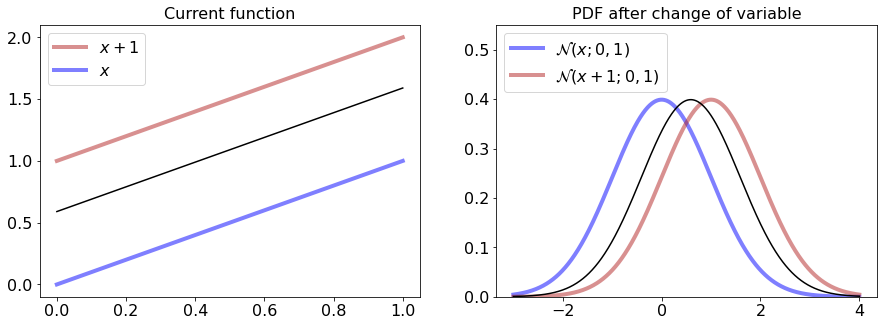

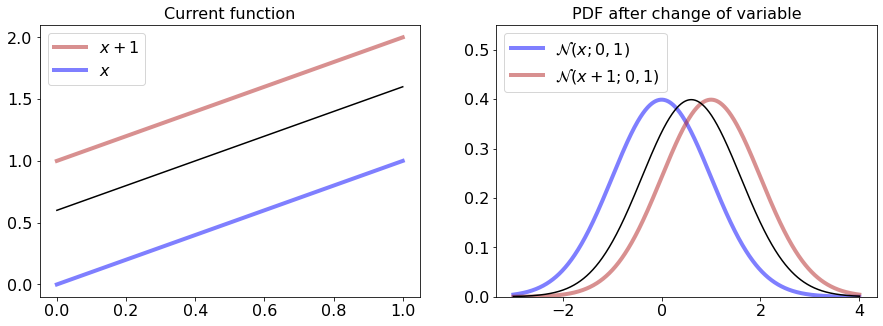

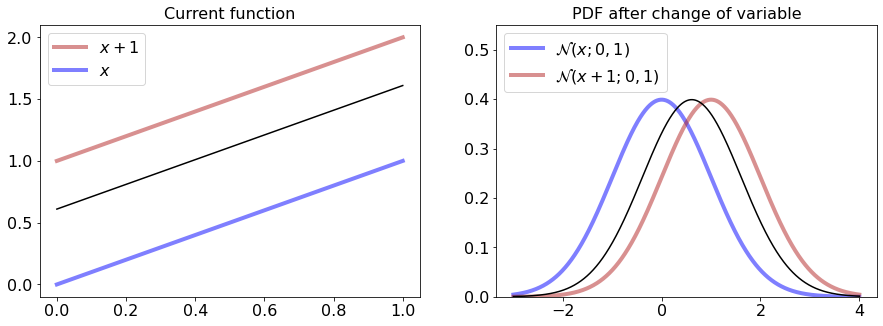

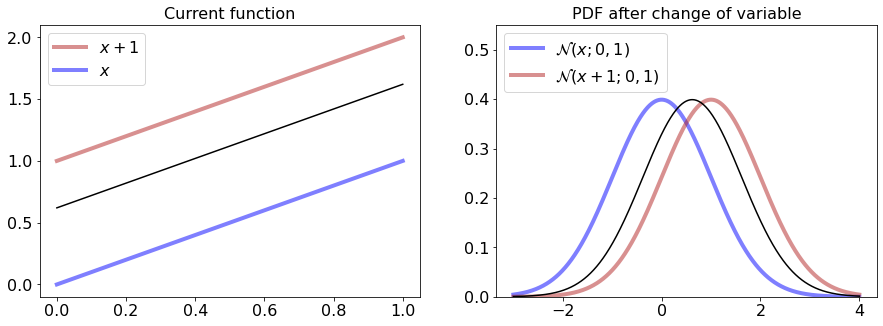

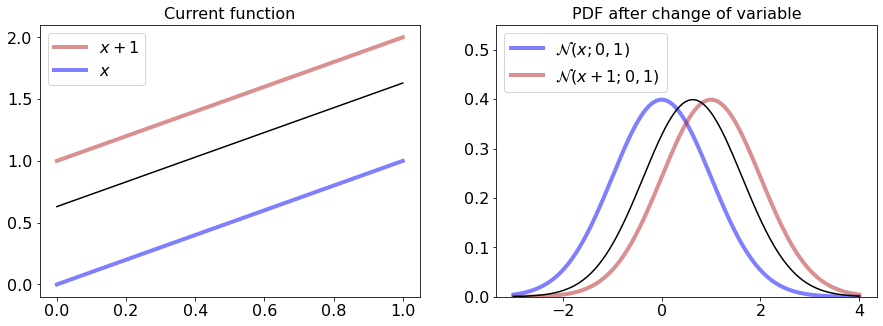

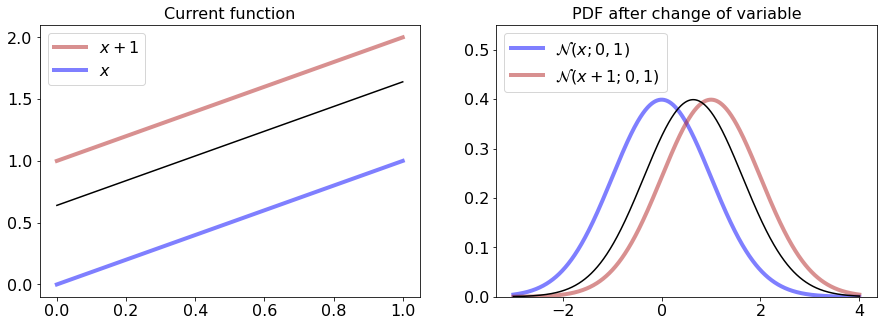

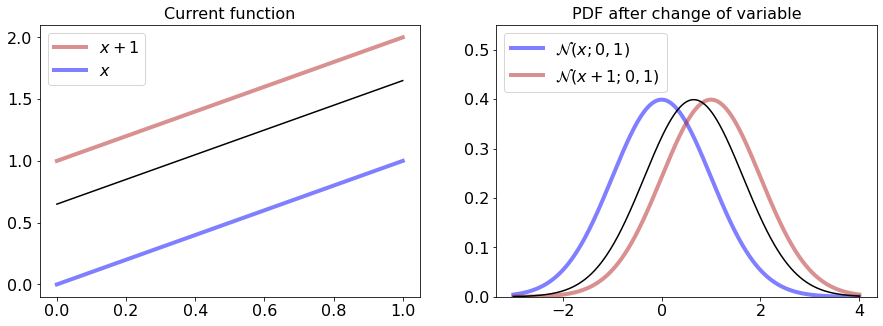

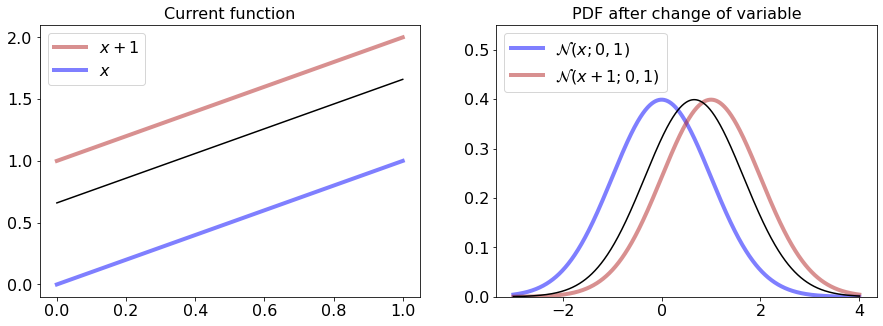

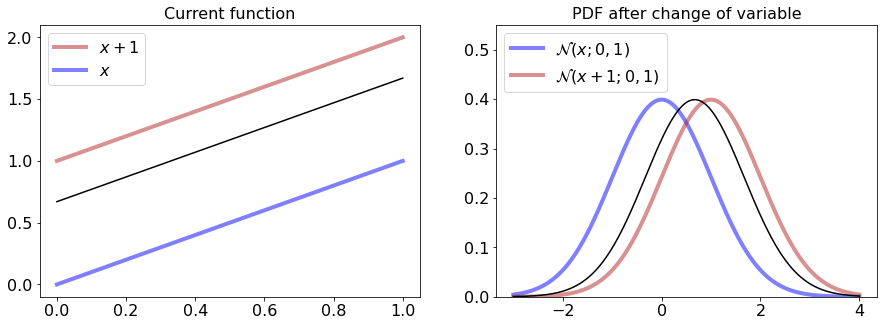

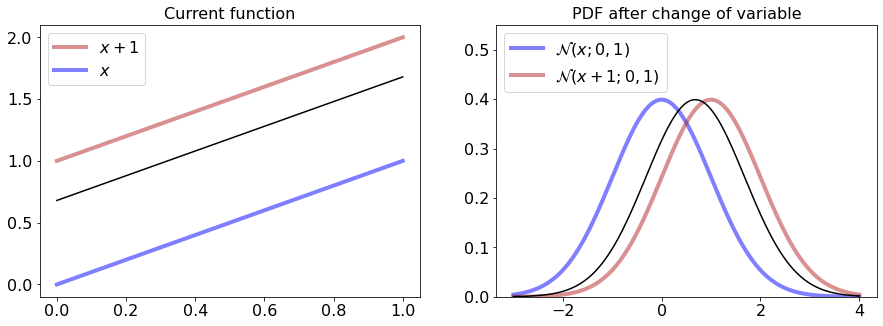

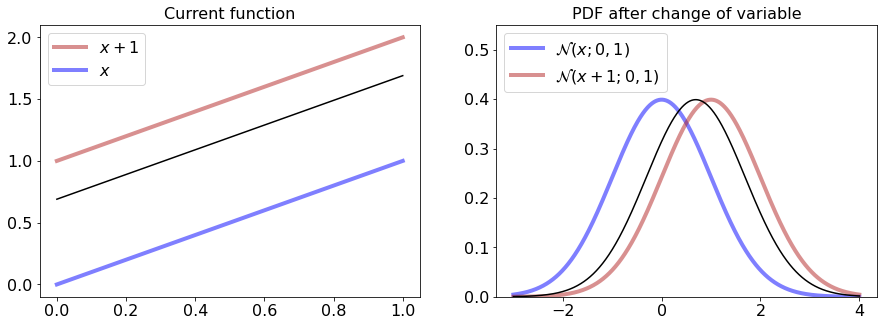

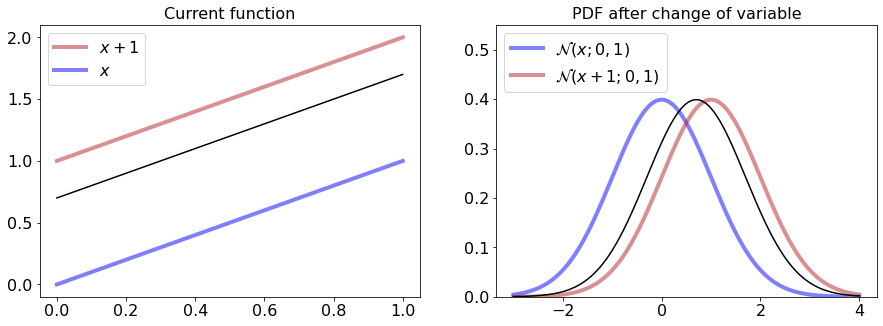

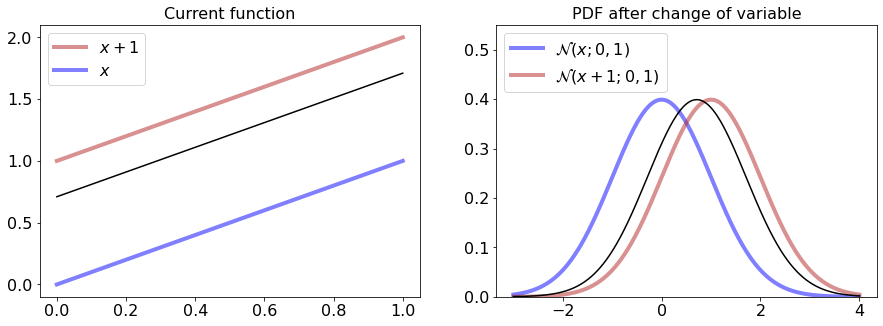

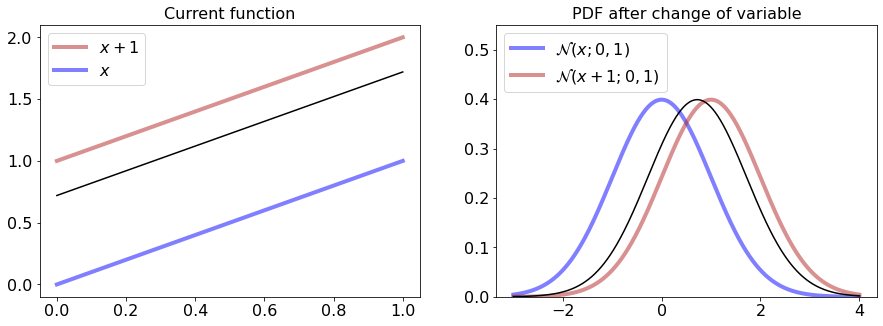

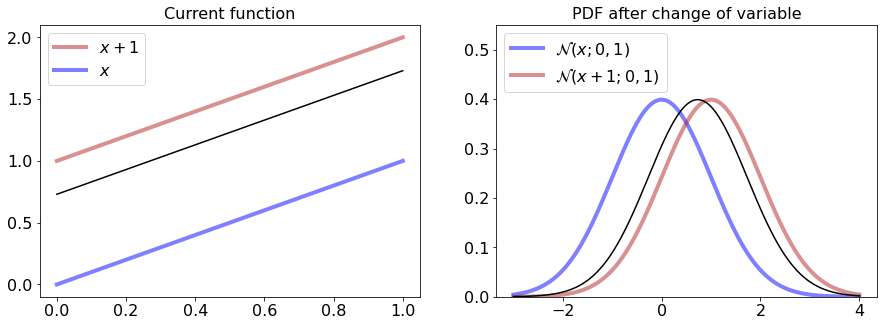

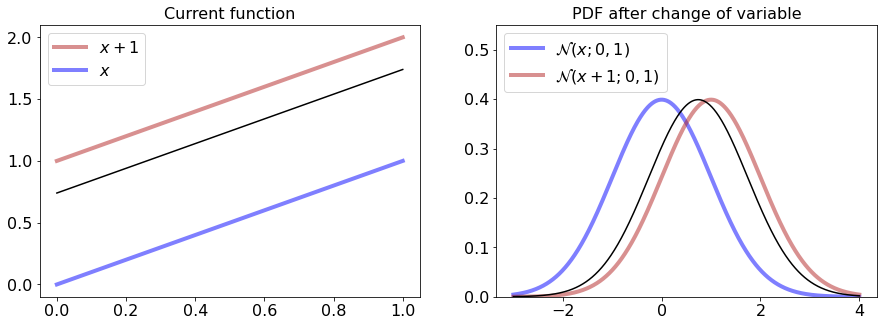

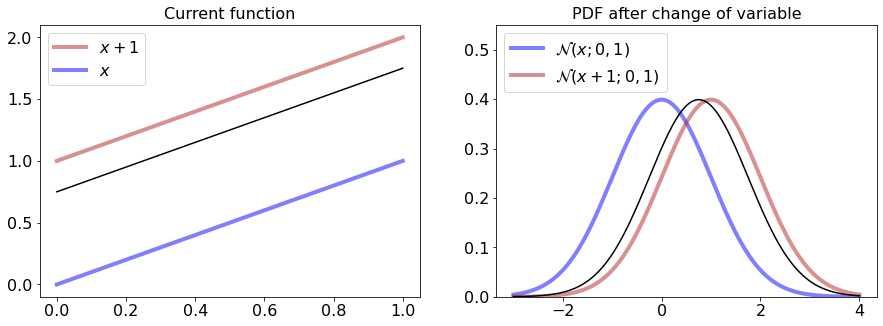

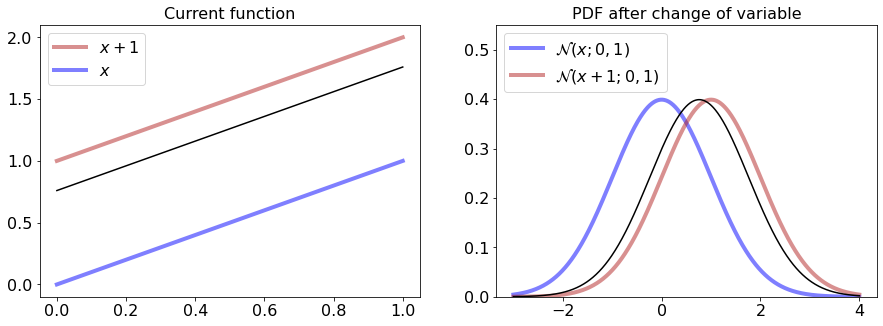

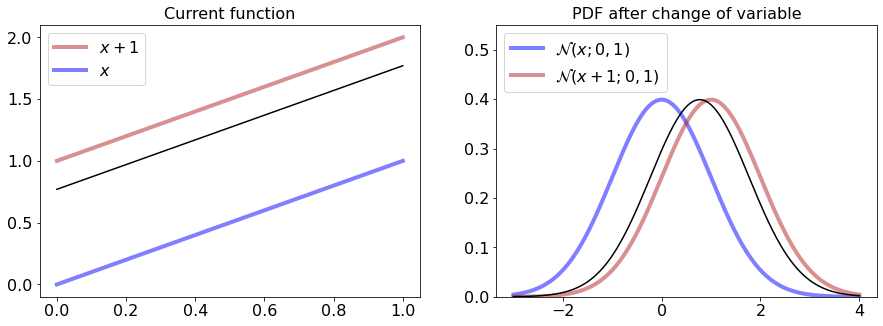

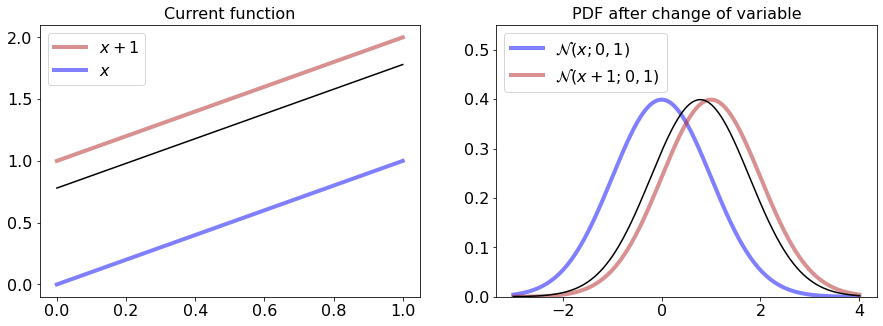

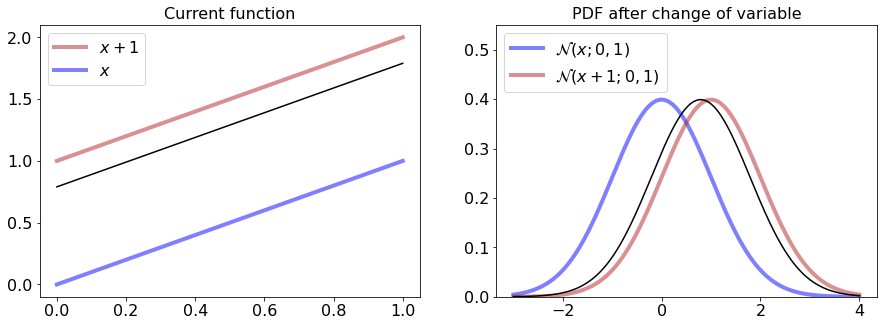

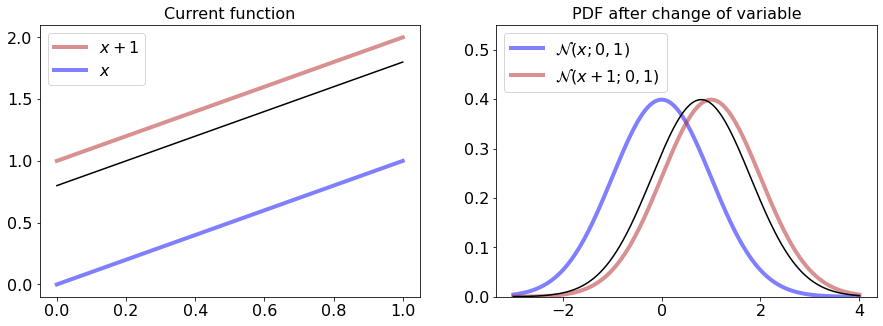

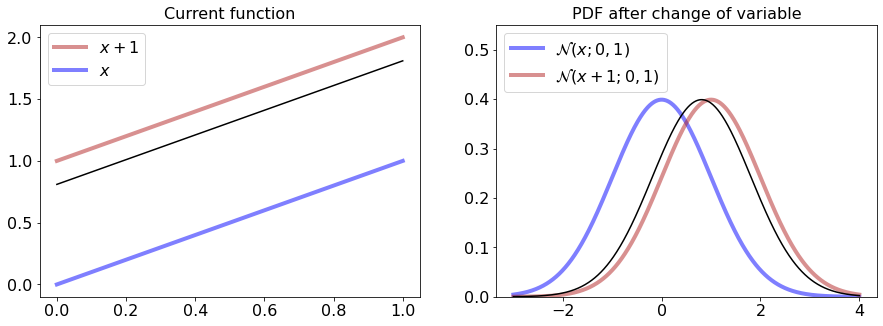

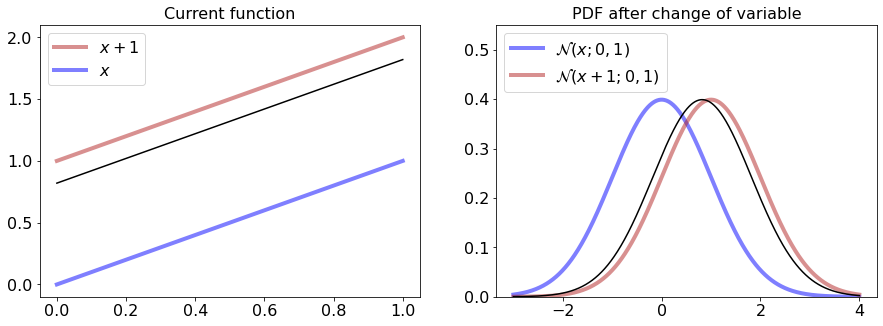

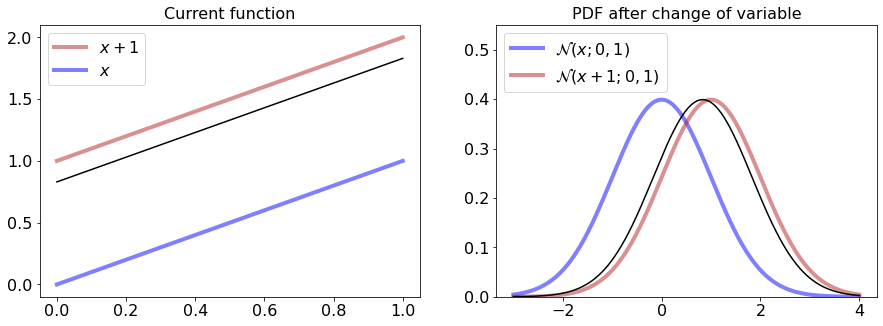

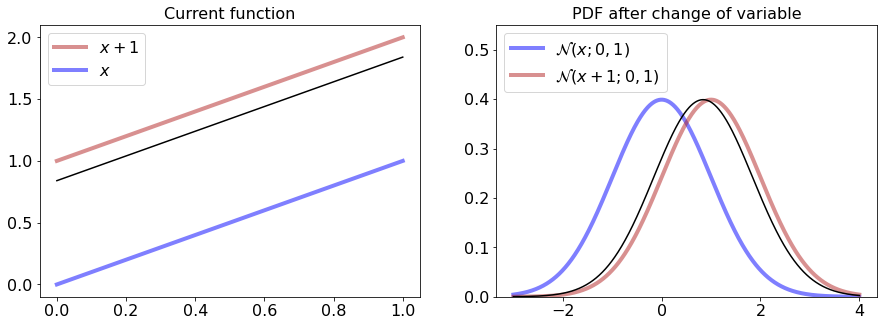

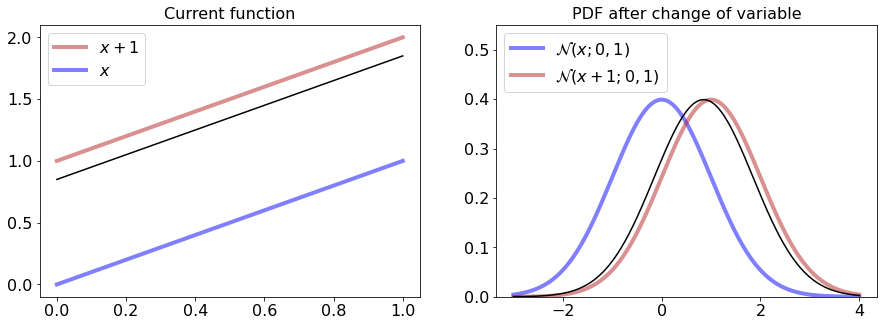

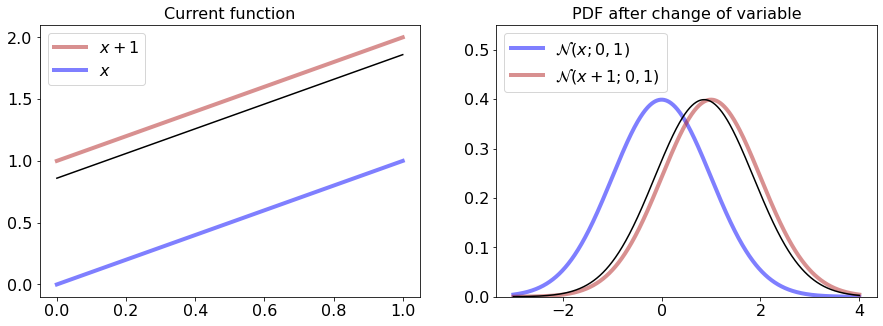

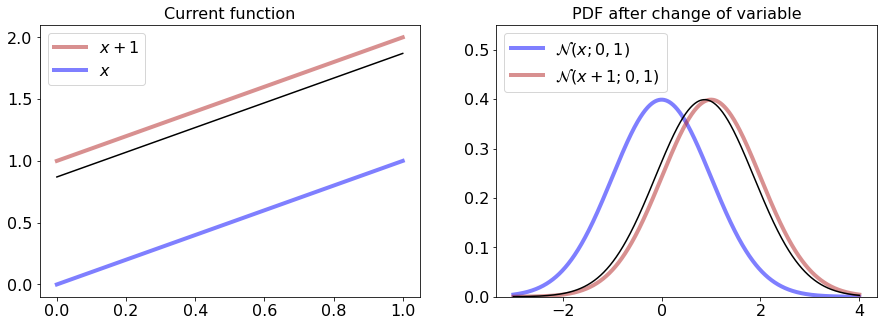

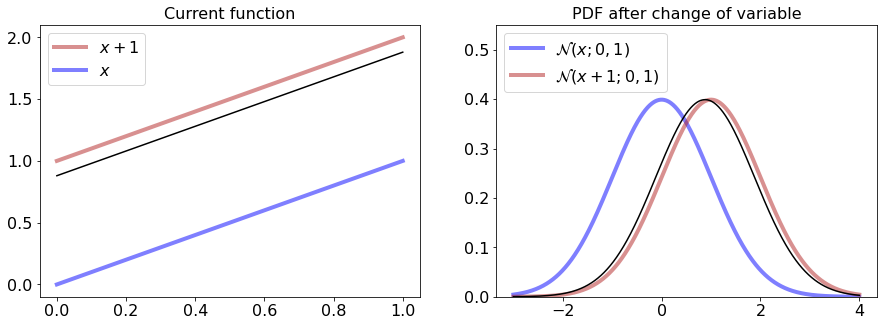

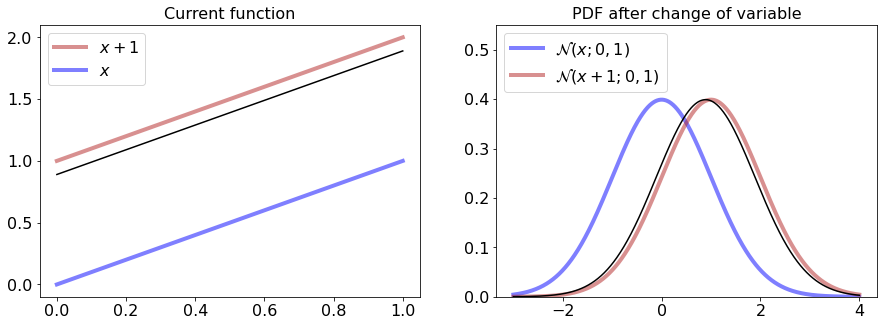

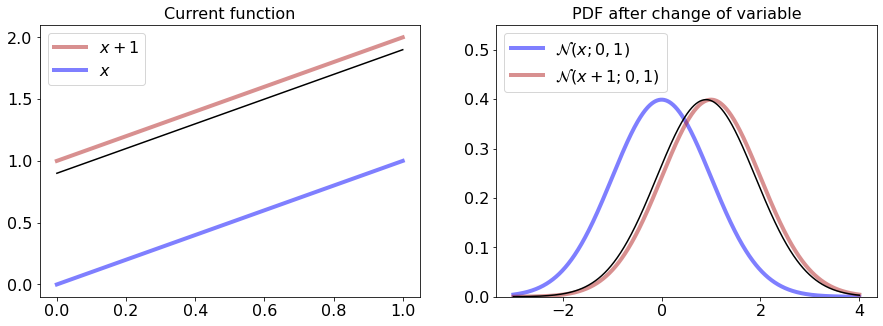

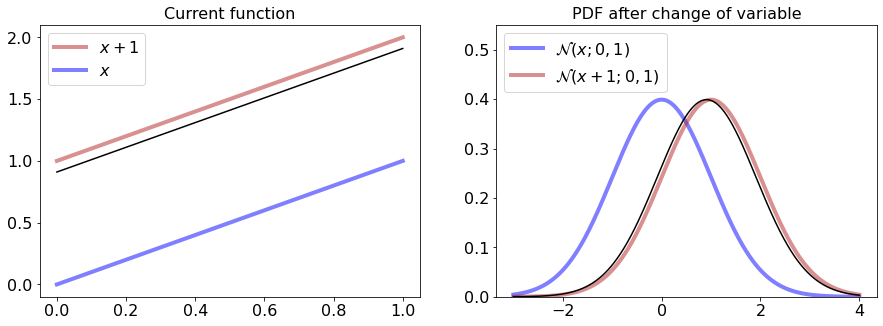

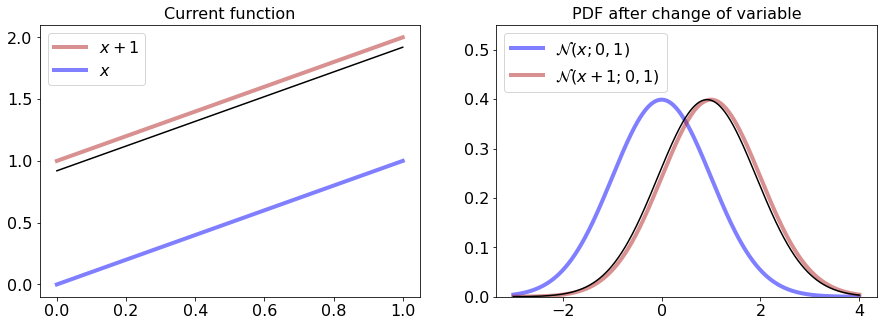

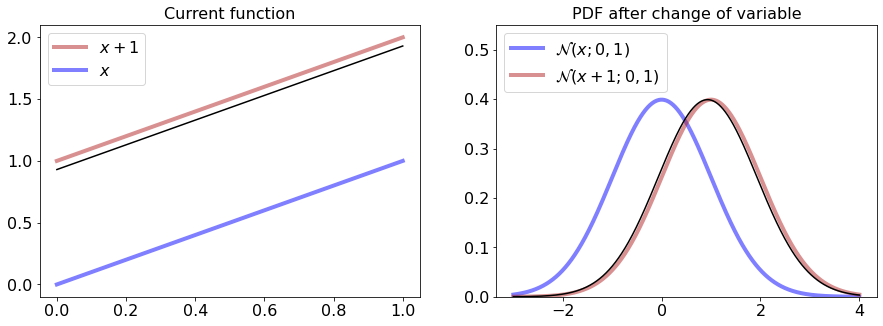

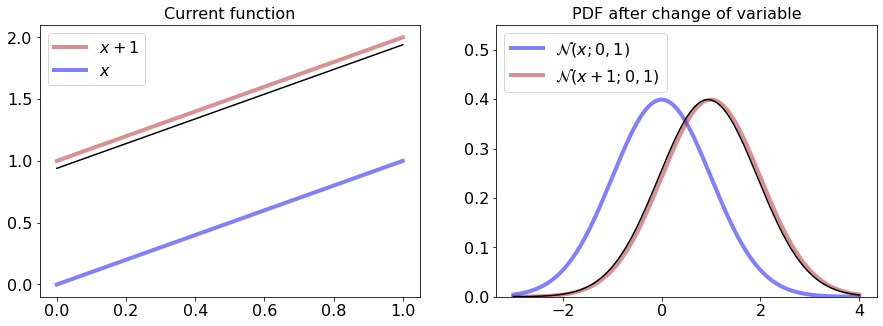

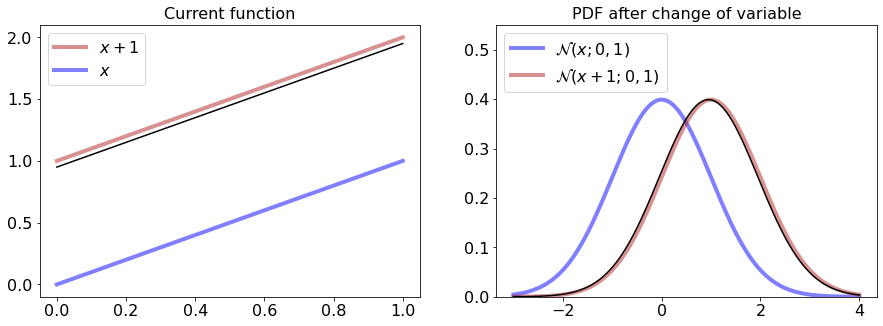

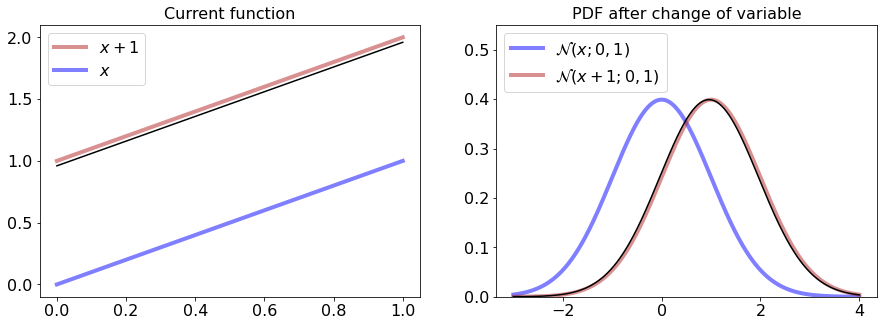

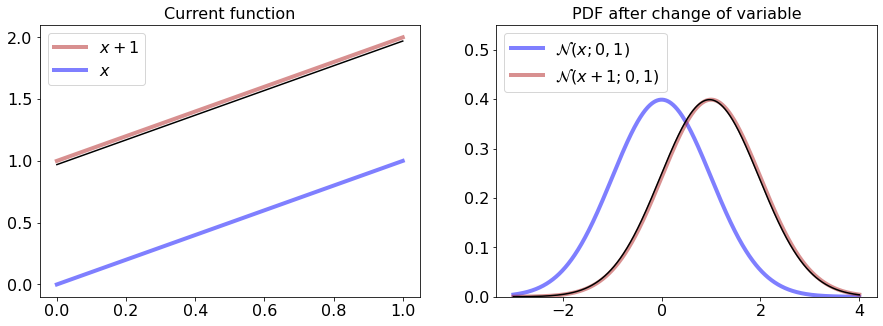

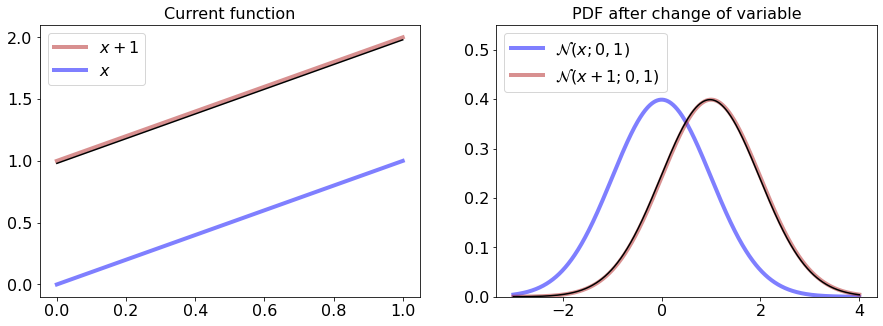

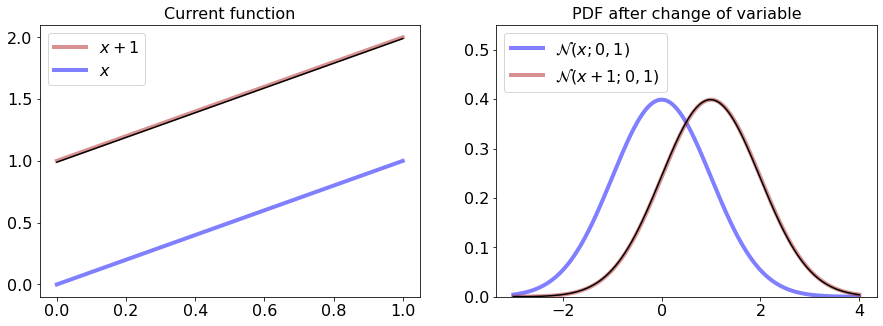

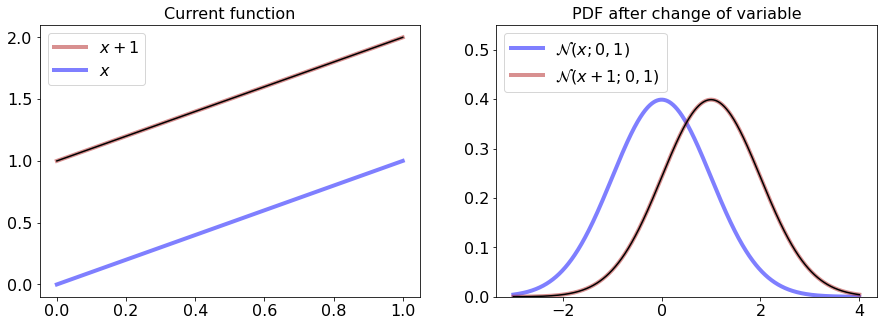

In [7]:
from scipy.stats import norm

x_ = np.linspace(0, 1, 1000+1)
x_R = np.linspace(-3, 4, 1000+1)
ds = np.linspace(0, 1, 100+1)

norm_pdf_0 = interpolate_Gaussian(x_R, mu=0, sigma=1, d=0)
norm_pdf_1 = interpolate_Gaussian(x_R, mu=0, sigma=1, d=1)

#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.close()

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
legend_size=16
title_size=16

for d_ in ds:
    
    #compute
    y_a1 = interpolate_xp1(x_, d=d_)
    y_a1_max = interpolate_xp1(x_, d=0)
    y_a1_min = interpolate_xp1(x_, d=1)

    norm_pdf_d = interpolate_Gaussian(x_R, mu=0, sigma=1, d=d_)
    
    #plot
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].plot(x_, y_a1_min, lw=4, alpha=0.5, color='firebrick', label='$x+1$')
    ax[0].plot(x_, y_a1_max, lw=4, alpha=0.5, color='blue', label='$x$')
    ax[0].plot(x_, y_a1, color='black')
    ax[0].set_title('Current function', size=title_size)
    ax[0].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].plot(x_R, norm_pdf_0, lw=4, alpha=0.5, color='blue', label=r'$\mathcal{N}(x; 0,1)$')
    ax[1].plot(x_R, norm_pdf_1, lw=4, alpha=0.5, color='firebrick', label='$\mathcal{N}(x+1; 0,1)$')
    ax[1].plot(x_R, norm_pdf_d, color='black')
    ax[1].set_title('PDF after change of variable', size=title_size)
    ax[1].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].set_ylim(0,0.55)
    
    plt.tight_layout()
    plt.show();

In [8]:
#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.close()

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
legend_size=16
title_size=16
plt.close()

def animate_func(i):
    
    d_ = ds[i]
    
    ax[0].cla()
    ax[1].cla()
    
    #compute
    #compute
    y_a1 = interpolate_xp1(x_, d=d_)
    y_a1_max = interpolate_xp1(x_, d=0)
    y_a1_min = interpolate_xp1(x_, d=1)

    norm_pdf_d = interpolate_Gaussian(x_R, mu=0, sigma=1, d=d_)
    
    ax[0].plot(x_, y_a1_min, lw=4, alpha=0.5, color='firebrick', label='$x+1$')
    ax[0].plot(x_, y_a1_max, lw=4, alpha=0.5, color='blue', label='$x$')
    ax[0].plot(x_, y_a1, color='black')
    ax[0].set_title('Current function', size=title_size)
    ax[0].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].plot(x_R, norm_pdf_0, lw=4, alpha=0.5, color='blue', label=r'$\mathcal{N}(x; 0,1)$')
    ax[1].plot(x_R, norm_pdf_1, lw=4, alpha=0.5, color='firebrick', label='$\mathcal{N}(x+1; 0,1)$')
    ax[1].plot(x_R, norm_pdf_d, color='black')
    ax[1].set_title('PDF after change of variable', size=title_size)
    ax[1].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].set_ylim(0,0.55)

    plt.tight_layout()


In [ ]:
from matplotlib import animation
from IPython.display import HTML

total_frames=100

# Animation setup
anim = animation.FuncAnimation(
    fig, func=animate_func, frames=total_frames, interval=100, blit=False
)
anim.save('Normal_x+1.gif', dpi=300)
HTML(anim.to_jshtml())